# Logistic regression

##  What is Logistic regression?  
Reference  
[Stanford CS229 lecture note](http://cs229.stanford.edu/notes/cs229-notes1.pdf)  

As we learned before, we can build linear regression model to explain (or predict) values.  
But what if the objective variable is binary variable (e.g Yes/No, OK/NG, Defect or not)? The binary variable can be converted to 1 and 0 (Yes=1, No=0), so we can build the regression model to predict the 1/0 value. 
But the linear regression model is not good model anymore because the predicted value can be more than 1 and less than 0.  
We can solve this problem with using "logistic regression".  
  
In logisctic regression, we use "Logit function (also known as Sigmoid function)" to convert $\sum_{i}^{n} \beta_{0} + \beta_{i}x_i$ to continuous vale between 0 and 1.  
  
The Logit function (aka Sigmoid function) is as below.

$$
g(z) = \frac{1}{1 + e^{-z}}
$$

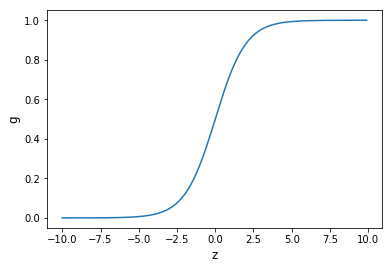

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
z = np.arange(-10,10,0.1)
g = 1/(1 + np.exp(-z))
plt.plot(z, g)
plt.xlabel('z', fontsize=12)
plt.ylabel('g', fontsize=12)
plt.show()

So the Logistic regression can be written as below.  
$$
f(x,\beta) = \frac{1}{1 + e^{- \sum_{k}^{n} \beta_{0} + \beta_{k}x_k}}
$$

Then, how can we find the proper $\beta_{i}$?  
We find them using maximum likehood estimation with a set of probabilistic assumptions.  
Let us assume that
$$
\begin{eqnarray*}
P(y = 1|x;\beta) &=& f(x, \beta)\\
P(y = 0|x;\beta) &=& 1 - f(x, \beta)
\end{eqnarray*}
$$

Note that this can be written more compactly as 
$$
p(y | x; \beta) = (f(x, \beta))^{y}(1 - f(x, \beta))^{1 - y}
$$

Assuming that the n (training examples) were generated independently, we can then write down likehood of the parameters as below.

$$  
\begin{eqnarray*}
\log L(\beta) &=& \log \prod_{i=1}^n p(y_i|x_i; \beta)\\
&=& \log \prod_{i=1}^n (f(x_i, \beta))^{y_i}(1 - f(x_i, \beta))^{1 - y_i}\\
&=& \sum_{i=1}^{n} y_i \log (f(x_i, \beta)) + (1 - y_i) \log (1 - f(x_i, \beta))\\              
\end{eqnarray*}
$$

Next, we maximize the log likehood using gradient descent.  
Before that I explain useful property of the logistic funtion (aka Sigmoid function). It is easy to calculate the derivative as below.

$$  
\begin{eqnarray*}
\frac{d g(z)}{dz} &=& \frac{d}{dz} \frac{1}{1 + e^{-z}}\\
                  &=& \frac{1}{(1 + e^{-z})^2}e^{-z}\\
                  &=& \frac{1}{1 + e^{-z}}(1 - \frac{1}{1+e^{-z}})\\
                  &=& g(z)(1 - g(z))
\end{eqnarray*}
$$  

Using equation above, we can easily calculate the derivative of log likehood function.  
$$
\begin{eqnarray*}
\frac{\partial}{\partial \beta_k} \log{L(\beta)} &=&
\end{eqnarray*}
$$